# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) 

# Intro to Pandas I

**Learning Objectives**
- **Understand** why a `DataFrame` and `Series` are useful for data analysis.
- **Practice** fundamental `DataFrame` and `Series` operations.
- **Compute** basic statistics of loaded data.
- **Filter** data within Pandas.

---

### Lesson Guide

#### [Pandas Introduction](#welcome)
- [About the Dataset: Adventureworks Cycles](#about)
- [Reading in Data](#reading)
- [Getting Basic Stats](#stepone)
- [Using the Index](#index)

**Columns**
- [Column Headers and Datatypes](#column)
- [Selecting Columns](#selecting)
- [Creating a New Column](#creating)
- [Renaming Columns](#renaming)
- [Common Column Operations](#operations)

**DataFrame Operations**
- [Filtering](#filtering)
- [Sorting](#sorting)
- [Exercises](#exercises)
- [Recap](#recap)

----

<a id='welcome'></a>

Pandas is the most prominent Python library for exploratory data analysis (EDA). The functions Pandas supports are integral to understanding, formatting, and preparing our data. Formally, we use Pandas to investigate, wrangle, munge, and clean our data. Pandas is the Swiss Army Knife of data manipulation!

If you intend to learn Pandas in-depth, your goal might be to be able to answer any question at all about the data using Pandas. A good way of thinking about an EDA, in fact, is to continue exploring until you can answer any question that someone may ask you about the data, anomalies in your graphs, etc.

---

<a id="pandas"></a>

## What Is Pandas?

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A **`Series`** is a **sequence** of items, where each item has a unique label (called an `index`).
- A **`DataFrame`** is a **table of data**. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`). Think like a **spreadsheet**
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

_Under the hood, for the savvy reader:_
> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.

## Why is Pandas so popular?

- Contains a large set of commonly used functions.
- It's relatively fast.
- Large open-source community.
- `numpy` is very popular, and since `pandas` is build off of it, it's very easy to use them in tandem.

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax.

For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

## Vectorization

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

In [62]:
x = range(10)

# Old way: Not vectorized!
x_old = [2*i + 1 for i in x]

print(x_old)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [63]:
# Vectorized!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_vec = np.array(x)   # Conversion to ndarray
#x_vec = 2*x_vec + 1

print(x_vec)

[0 1 2 3 4 5 6 7 8 9]


Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

## Class Methods and Attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```python
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

## Viewing Documentation

There are a few ways to find more information about a method.

**Method 1:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```python
users.head?
```

```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of IPython is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
```python
help(users.head)
```

In [5]:
sorted?

In [6]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [7]:
print(sorted(x))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


**Method 2:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

<a id='about'></a>
## About the Dataset: Adventureworks Cycles

<img align="right" src="http://lh6.ggpht.com/_XjcDyZkJqHg/TPaaRcaysbI/AAAAAAAAAFo/b1U3q-qbTjY/AdventureWorks%20Logo%5B5%5D.png?imgmax=800">

For today's Pandas exercises, we will be using a dataset developed by Microsoft for training purposes in SQL server, known the [Adventureworks Cycles 2014OLTP Database](https://github.com/Microsoft/sql-server-samples/releases/tag/adventureworks). It is based on a fictitious company called Adventure Works Cycles (AWC), a multinational manufacturer and seller of bicycles and accessories. The company is based in Bothell, Washington, USA and has regional sales offices in several countries. We will be looking at a single table from this database, the Production.Product table, which outlines some of the products this company sells. 

A full data dictionary can be viewed [here](https://www.sqldatadictionary.com/AdventureWorks2014/).


Let's take a closer look at the Production.Product table [data dictionary](https://www.sqldatadictionary.com/AdventureWorks2014/Production.Product.html), which is a description of the fields (columns) in the table (the .csv file we will import below):
- **ProductID** - Primary key for Product records.
- **Name** - Name of the product.
- **ProductNumber** - Unique product identification number.
- **MakeFlag** - 0 = Product is purchased, 1 = Product is manufactured in-house.
- **FinishedGoodsFlag** - 0 = Product is not a salable item. 1 = Product is salable.
- **Color** - Product color.
- **SafetyStockLevel** - Minimum inventory quantity.
- **ReorderPoint** - Inventory level that triggers a purchase order or work order.
- **StandardCost** - Standard cost of the product.
- **ListPrice** - Selling price.
- **Size** - Product size.
- **SizeUnitMeasureCode** - Unit of measure for the Size column.
- **WeightUnitMeasureCode** - Unit of measure for the Weight column.
- **DaysToManufacture** - Number of days required to manufacture the product.
- **ProductLine** - R = Road, M = Mountain, T = Touring, S = Standard
- **Class** - H = High, M = Medium, L = Low
- **Style** - W = Womens, M = Mens, U = Universal
- **ProductSubcategoryID** - Product is a member of this product subcategory. Foreign key to ProductSubCategory.ProductSubCategoryID.
- **ProductModelID** - Product is a member of this product model. Foreign key to ProductModel.ProductModelID.
- **SellStartDate** - Date the product was available for sale.
- **SellEndDate** - Date the product was no longer available for sale.
- **DiscontinuedDate** - Date the product was discontinued.
- **rowguid** - ROWGUIDCOL number uniquely identifying the record. Used to support a merge replication sample.
- **ModifiedDate** - Date and time the record was last updated.


## Importing Pandas

To [import a library](https://docs.python.org/3/reference/import.html), we write `import` and the library name. For Pandas, is it common to name the library `pd` so that when we reference a function from the Pandas library, we only write `pd` to reference the aliased [namespace](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces) -- not `pandas`.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# we can see the details about the imported package by referencing its private class properties
print('I am using', pd.__name__, 'version:', pd.__version__)
print('It is installed at:', pd.__path__)

I am using pandas version: 1.1.3
It is installed at: ['C:\\Users\\614318\\Anaconda3\\lib\\site-packages\\pandas']


<a id='reading'></a>
## Reading in Data

Pandas dramatically simplifies the process of reading in data. When we say "reading in data," we mean loading a file into our machine's memory.

Suppose you have a CSV -- Comma-Separated Value -- file, for example, and then you double-click to open it in Microsoft Excel. The open file is then "read into memory." You can now manipulate the CSV data in your memory, then eventually write it back to disk.

When we read data into memory in Python, we create an object. We will soon explore these objects.

---

Because we are working with a CSV, we will use the [read CSV](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method.

A [delimiter](https://en.wikipedia.org/wiki/Delimiter-separated_values) is a character that separates fields (columns) in the imported file. Note that the `.csv` extension does not necessarily mean that a comma is used as the delimiter! In fact, it is always helpful to open each data file and observe what it uses as a delimiter.

In this case, we have a tab character as the delimiter for our columns, so we will be using `sep='\t'` to tell pandas to 'cut' the columns every time it sees a [tab character in the file](http://vim.wikia.com/wiki/Showing_the_ASCII_value_of_the_current_character).

In [9]:
# show first three rows
prod.head(3)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
1,2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
2,3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000


*Documentation Pause*

How did we know how to use `pd.read_csv`? We read the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)! Note the first and only required argument is (`filepath`).
> Take a moment to dissect some of the other options when reading in data.

---

We read the CSV file into a `DataFrame` object. How do we know this for sure? Let's verify what type of object `prod` is using Python's built-in function `type`.

In [10]:
# show type of prod
type(prod)

pandas.core.frame.DataFrame

---

Throughout this lesson, we will be analyzing the UFO dataset below for practice!

In [11]:
# read in Product dataset
ufos = pd.read_csv('./datasets/ufo.csv')

In [14]:
# show 10 randomly sampled rows
ufos.sample(10)
ufos.head()
prod.shape

(504, 25)

<a id='inspecting'></a>
## Inspecting our `DataFrame`: The basics

We can now perform basic operations on the `DataFrame`, denoted with comments.

In [8]:
# print the first and last 3 rows
# hint: there is a `tail` method for the final rows.


,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
501,997,"Road-750 Black, 44",BK-R19B-44,1,1,Black,100,75,343.6496,539.99,...,R,L,U,2.0,31.0,2013-05-30 00:00:00,NaN,NaN,{44CE4802-409F-43AB-9B27-CA53421805BE},2014-02-08 10:01:36.827000000
502,998,"Road-750 Black, 48",BK-R19B-48,1,1,Black,100,75,343.6496,539.99,...,R,L,U,2.0,31.0,2013-05-30 00:00:00,NaN,NaN,{3DE9A212-1D49-40B6-B10A-F564D981DBDE},2014-02-08 10:01:36.827000000
503,999,"Road-750 Black, 52",BK-R19B-52,1,1,Black,100,75,343.6496,539.99,...,R,L,U,2.0,31.0,2013-05-30 00:00:00,NaN,NaN,{AE638923-2B67-4679-B90E-ABBAB17DCA31},2014-02-08 10:01:36.827000000


Notice that `.head()` is a method (a function that is part of an object). How might we tell this?

method

Just by looking at the code -- `prod.head()` -- we know that `head` must a function! The empty parentheses give this away -- they indicate we are "calling" the function. Only functions can be called.

**Class Question:** 
- What do you think changes if we pass a different number `head()` argument?
- How would we print the last 5 rows?

In [16]:
# identify the shape (rows by columns) 
# use .shape (no parentheses!)
prod.shape

(504, 25)

Note that `shape` does not have parentheses because it is not a function. Typically, a function "computes" something. A non-function attribute (such as `shape`) is a property of the object that is directly stored. Don't worry if you find it difficult to guess what might be an object vs. a property. When in doubt, just use `type`!

In [15]:
type(prod.shape)

tuple

Here we have 504 rows, and 25 columns. This is a tuple, so we can extract the parts using indexing:

In [17]:
# print the number of rows as an int
num_rows, num_cols = prod.shape

## Now you try!

With the UFO dataset (`ufos`):

+ How many rows?
+ How many columns?
+ What are the first 10 rows?

In [21]:
print(ufos.shape)

ufos.head(10)

(80543, 5)


,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


<a id='stepone'></a>
## Step One: Get basic data stats

Now that we have our data loaded in, we should start exploring it! Typically, right away we'll want to find out some basic properties of our data.

Let's get a list of only our columns.

In [25]:
print(prod.columns)

Index(['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag',
       'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost',
       'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode',
       'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')


Don't worry that it's of type `Index` -- you can always convert this to a list if it's confusing.

In [26]:
list(prod.columns)

['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style', 'ProductSubcategoryID', 'ProductModelID', 'SellStartDate', 'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate']

---

Every element in a column must have the same datatype. Packaging each column in this way allows Pandas to store the data very compactly and retrieve it very efficiently.

First, let's get a list of all columns and the datatypes of each column. Here are a few common datatypes Pandas auto-converts to:

- `int64` - Integer (whole number) stored using 64 bits (a sequence of 64 0s or 1s).
- `float64` - Floating-point number (decimal number) stored using 64 bits.
- `object` - A Python object. (If loaded from a  CSV, this will always be a string!)m

In [27]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductID              504 non-null    int64  
 1   Name                   504 non-null    object 
 2   ProductNumber          504 non-null    object 
 3   MakeFlag               504 non-null    int64  
 4   FinishedGoodsFlag      504 non-null    int64  
 5   Color                  256 non-null    object 
 6   SafetyStockLevel       504 non-null    int64  
 7   ReorderPoint           504 non-null    int64  
 8   StandardCost           504 non-null    float64
 9   ListPrice              504 non-null    float64
 10  Size                   211 non-null    object 
 11  SizeUnitMeasureCode    176 non-null    object 
 12  WeightUnitMeasureCode  205 non-null    object 
 13  Weight                 205 non-null    float64
 14  DaysToManufacture      504 non-null    int64  
 15  Produc

`info` also tells you how many non-null values we have and the total memory usage. Note that some columns have only nulls. How might you interpret the null values?

In Pandas, null values are stored as NaN - Not a Number. Unfortunately, Pandas can only store these values in `float` or `object` columns. So, columns that are otherwise integers will be coverted to a `float` column!

For example, notice that `ProductModelID` only contains nulls and integers -- yet its column type is `float64`.

In [42]:
prod['ProductModelID']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
474    35.0
475    35.0
476    35.0
477    27.0
478    27.0
479    27.0
480    27.0
481    31.0
482    36.0
483    36.0
484    22.0
485    22.0
486    22.0
487    22.0
488    23.0
489    23.0
490    23.0
491    23.0
492    23.0
493    23.0
494    23.0
495    23.0
496    23.0
497    23.0
498    95.0
499    96.0
500    97.0
501    31.0
502    31.0
503    31.0
Name: ProductModelID, Length: 504, dtype: float64

## Now you try!

With the UFO dataset (`ufos`):

+ What are the columns?
+ What datatypes are the columns? Any missing values?
+ Look at some of the columns.

In [30]:
ufos.columns
ufos.info()
ufos['Shape Reported'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80496 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
 4   Time             80543 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


array(['TRIANGLE', 'OTHER', 'OVAL', 'DISK', 'LIGHT', 'CIRCLE', 'CIGAR',
       'CYLINDER', 'FIREBALL', 'SPHERE', nan, 'RECTANGLE', 'FORMATION',
       'FLASH', 'CHEVRON', 'EGG', 'CONE', 'DIAMOND', 'VARIOUS',
       'TEARDROP', 'CROSS', 'DELTA', 'ROUND', 'DOME', 'PYRAMID',
       'CRESCENT', 'FLARE', 'HEXAGON'], dtype=object)

---

Next, it's useful to get summary statistics for each column. 

In [32]:
prod.describe() #only shows numerical columns
prod.describe(include=np.object) #just strings

,Name,ProductNumber,Color,Size,SizeUnitMeasureCode,WeightUnitMeasureCode,ProductLine,Class,Style,SellStartDate,SellEndDate,rowguid,ModifiedDate
count,504,504,256,211,176,205,278,247,211,504,98,504,504
unique,504,504,9,18,1,2,4,3,3,4,2,504,2
top,Lock Washer 7,SB-M891-M,Black,44,CM,LB,R,L,U,2008-04-30 00:00:00,2013-05-29 00:00:00,{CE4849B4-56E6-4B50-808B-9BDE67CC4704},2014-02-08 10:01:36.827000000
freq,1,1,93,29,176,176,100,97,176,211,69,1,503


Five Number Summary (all assumes numeric data):
- **Min:** The smallest value in the column
- **Max:** The largest value in the column
- **Quartile:** A quartile is one fourth of our data
    - **First quartile:** This is the bottom most 25 percent
    - **Median:** The middle value. (Line all values biggest to smallest - median is the middle!) Also the 50th percentile
    - **Third quartile:** This the the top 75 percentile of our data


From these basic stats, we can quickly see if there are erroneous values and outliers. Along with `info`, it will nearly always give us some ideas of what to look at next. This dataset looks fairly clean, but most are not! Do you see any interesting values?

**Question:** How do you think that `describe` computes these statistics if null values are present?

**Question:** Also note that we're missing some columns in the `describe` output! Do you know why?

In [29]:
prod.describe(include='all')

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
count,504.000000,504,504,504.000000,504.000000,256,504.000000,504.000000,504.000000,504.000000,...,278,247,211,295.000000,295.000000,504,98,0.0,504,504
unique,NaN,504,504,NaN,NaN,9,NaN,NaN,NaN,NaN,...,4,3,3,NaN,NaN,4,2,NaN,504,2
top,NaN,"Sport-100 Helmet, Red",RA-7490,NaN,NaN,Black,NaN,NaN,NaN,NaN,...,R,L,U,NaN,NaN,2008-04-30 00:00:00,2013-05-29 00:00:00,NaN,{0A72791C-A984-4733-AE4E-2B4373CFD7CD},2014-02-08 10:01:36.827000000
freq,NaN,1,1,NaN,NaN,93,NaN,NaN,NaN,NaN,...,100,97,176,NaN,NaN,211,69,NaN,1,503
mean,673.039683,NaN,NaN,0.474206,0.585317,NaN,535.150794,401.363095,258.602961,438.666250,...,NaN,NaN,NaN,12.294915,37.444068,NaN,NaN,NaN,NaN,NaN
std,229.373142,NaN,NaN,0.499830,0.493157,NaN,374.112954,280.584715,461.632808,773.602843,...,NaN,NaN,NaN,9.860135,34.025442,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.000000,0.000000,NaN,4.000000,3.000000,0.000000,0.000000,...,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,447.750000,NaN,NaN,0.000000,0.000000,NaN,100.000000,75.000000,0.000000,0.000000,...,NaN,NaN,NaN,2.000000,11.000000,NaN,NaN,NaN,NaN,NaN
50%,747.500000,NaN,NaN,0.000000,1.000000,NaN,500.000000,375.000000,23.372200,49.990000,...,NaN,NaN,NaN,12.000000,26.000000,NaN,NaN,NaN,NaN,NaN
75%,873.250000,NaN,NaN,1.000000,1.000000,NaN,1000.000000,750.000000,317.075825,564.990000,...,NaN,NaN,NaN,17.000000,48.500000,NaN,NaN,NaN,NaN,NaN


Aside from these summary statistics, we may want to view how each column is distributed.

For example, let's see the distribution of `ListPrice`.

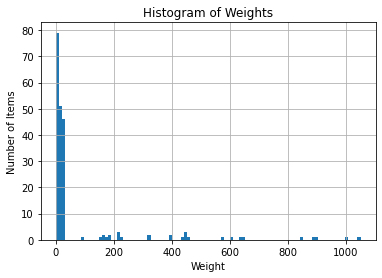

In [36]:
prod['Weight'].hist(bins=100);

plt.xlabel('Weight')
plt.ylabel('Number of Items')
plt.title('Histogram of Weights');

This is called a long-tail distribution. However, be careful when interpreting distributions!

The majority of products are in the first bin, which may mean they cost nothing. If this is the case, the data may be bad or perhaps the products are not for sale. We must be very careful when looking at these distributions!

## Now you try!

With the UFO dataset (`ufos`):

+ Use `describe` to look at all of the columns.
+ Do the values look as expected?
+ Plot a histogram of the times so we can see how many were seen over time.

<AxesSubplot:title={'center':'Histogram of UFO Sightings by Time'}, xlabel='Time', ylabel='Count'>

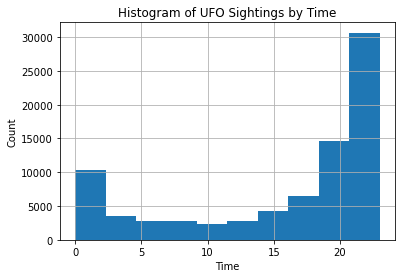

In [49]:
ufos['Timestamp'] = pd.to_datetime(ufos['Time'])

#ufos['Time'].hist()

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Histogram of UFO Sightings by Time');



---

<a id='index'></a>
## Using the index

A `DataFrame` has columns along the top and an index down the rows. (Although, as we'll see, both are stored as indexes since a `DataFrame` can easily be transposed!)

An [index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html) is the basic object storing axis labels for all pandas objects. Think of it as a 'row address' for your `DataFrame` (table). It is best practice to explicitly set the index of your dataframe rather than just use auto-incrementing integers. Why? Indexes are commonly used as [primary keys](https://en.wikipedia.org/wiki/Primary_key) which can be used to [join](https://www.w3schools.com/sql/sql_join.asp) your dataframe to other dataframes. Also, the index is the default x axis when making a graph.

The `DataFrame` can store different types (`int`, `str`, `datetime`). When importing data, it will automatically assign a number to each row, starting at zero and counting up. You can overwrite this, which is what we are going to do.

In [50]:
# displaying the index as it sits (auto-generated upon import)
# use .index (no parentheses!)
ufos.index

RangeIndex(start=0, stop=80543, step=1)

In [51]:
# also note that our auto-generated index has no name
# to get the name of an index, it's .index.name

ufos.index.name

In [20]:
# Here we are looking at three columns;
# - The left-most column is the index (automatically generated upon import by pandas).
# - 'ProductID' is our PK (primary key) from our imported table. 
# - 'Name' is a data column.

# Notice that the generated index starts at zero and our PK starts at 1.

prod[['ProductID', 'Name']].head(3)

,ProductID,Name
0,1,Adjustable Race
1,2,Bearing Ball
2,3,BB Ball Bearing


In [15]:
# Setting the index overwrites the automatically generated index
# with our PK, which resided in the 'ProductID' column.


In [16]:
# Note how our index property has changed as a result (how did we look at the index above?)
# Try to type from memory -- but if you can't, scroll up!


,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000


In [ ]:
# And our index has also inherited the name of our 'ProductID' column!


## Now you try!

With the UFO dataset (`ufos`):

+ View the index by itself.
+ Set the date and time of the sighting as the index!
+ Now, view the index again.

In [57]:
ufos

,City,Colors Reported,Shape Reported,State,Time
Timestamp,,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
1931-06-01 13:00:00,Abilene,NaN,DISK,KS,6/1/1931 13:00
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
2014-09-04 23:20:00,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
2014-09-05 01:14:00,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
2014-09-05 02:40:00,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40


<a id='column'></a>
## Column headers and datatypes

In [17]:
# print the columns
# use .columns (no parentheses)


Index(['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')

In [34]:
# examine only the datatypes of the columns
# note that these were automatically inferred by pandas upon import!

prod.dtypes

ProductID                  int64
Name                      object
ProductNumber             object
MakeFlag                   int64
FinishedGoodsFlag          int64
Color                     object
SafetyStockLevel           int64
ReorderPoint               int64
StandardCost             float64
ListPrice                float64
Size                      object
SizeUnitMeasureCode       object
WeightUnitMeasureCode     object
Weight                   float64
DaysToManufacture          int64
ProductLine               object
Class                     object
Style                     object
ProductSubcategoryID     float64
ProductModelID           float64
SellStartDate             object
SellEndDate               object
DiscontinuedDate         float64
rowguid                   object
ModifiedDate              object
dtype: object

**Class Question:** Why do datatypes matter? What operations could we perform on some datatypes that we could not on others? Note the importance of this in checking dataset integrity.

---

<a id='selecting'></a>
## Selecting Columns

Now that we've looked at the index and column labels by themselves, it's time to look at the data! Let's first try just getting a column at a time.

We can select columns in two ways. Either we treat the column as an attribute of the DataFrame or we index the DataFrame for a specific element (in this case, the element is a column name).

In [41]:
# show difference between single (Series) and double (DataFrame) bracket notation
print('If I use SINGLE brackets, pandas returns:', type(prod['Name']))
      
print('If I use DOUBLE brackets, pandas returns:', type(prod[['Name']]))

If I use SINGLE brackets, pandas returns: <class 'pandas.core.series.Series'>
If I use DOUBLE brackets, pandas returns: <class 'pandas.core.frame.DataFrame'>


In [61]:
# Try it on your own! Select a column as a Series object. 
# Pick something other than the Name column. 
# Try using the head method too, to limit the number of rows you get.

prod.head(3)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
1,2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
2,3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000


In [27]:
# Try it on your own! Select a column as a DataFrame object. Pick something other than the Name column. 
# Try using the head method too, to limit the number of rows you get.


,ListPrice
ProductID,
1,0.0
2,0.0
3,0.0
4,0.0
316,0.0


In [29]:
# When selecting > 1 column, you must use double brackets! 
# Try selecting multiple columns.


ProductID
1         NaN
2         NaN
3         NaN
4         NaN
316       NaN
317     Black
318     Black
319     Black
320    Silver
321    Silver
322     Black
323       NaN
324       NaN
325       NaN
326       NaN
327       NaN
328       NaN
329       NaN
330       NaN
331       NaN
332    Silver
341       NaN
342       NaN
343       NaN
344       NaN
345       NaN
346       NaN
347       NaN
348       NaN
349       NaN
        ...  
970      Blue
971      Blue
972      Blue
973    Yellow
974    Yellow
975    Yellow
976    Yellow
977     Black
978      Blue
979      Blue
980    Silver
981    Silver
982    Silver
983    Silver
984    Silver
985    Silver
986    Silver
987    Silver
988    Silver
989     Black
990     Black
991     Black
992     Black
993     Black
994       NaN
995       NaN
996       NaN
997     Black
998     Black
999     Black
Name: Color, Length: 504, dtype: object

**Class Question:** What if we wanted to select a column that has a space in it? Which method would you use?

- production.New Column
- production['New Column']

## Now you try!

With the UFO dataset (`ufos`):

+ View some columns individually, only selecting the first few rows of each.
+ Try using both methods above to select columns.

In [ ]:
# A:

<a id='creating'></a>
### Creating a new column

In [45]:
# Here, we create a column with a space
prod['Tax'] = prod.ListPrice * 0.10      # 10% tax!

In [46]:
prod['TotalPrice'] = prod.ListPrice + prod.Tax

In [44]:
# Here, we create a column with a space
prod['New Column'] = range(504)         # [0, 1, 2, 3, ..., 502, 503]

In [33]:
# Try to select that column using both methods.
# Which works and which doesn't? 
#prod.Barb Column
#prod['Barb Column']


ProductID
1         0.00
2         0.00
3         0.00
4         0.00
316       0.00
317       0.00
318       0.00
319       0.00
320       0.00
321       0.00
322       0.00
323       0.00
324       0.00
325       0.00
326       0.00
327       0.00
328       0.00
329       0.00
330       0.00
331       0.00
332       0.00
341       0.00
342       0.00
343       0.00
344       0.00
345       0.00
346       0.00
347       0.00
348       0.00
349       0.00
        ...   
970    1214.85
971    1214.85
972    1214.85
973    1700.99
974    1700.99
975    1700.99
976    1700.99
977     539.99
978     742.35
979     742.35
980     769.49
981     769.49
982     769.49
983     769.49
984     564.99
985     564.99
986     564.99
987     564.99
988     564.99
989     539.99
990     539.99
991     539.99
992     539.99
993     539.99
994      53.99
995     101.24
996     121.49
997     539.99
998     539.99
999     539.99
Name: ListPrice, Length: 504, dtype: float64

## Now you try!

With the UFO dataset (`ufos`):

+ Create a new column 'Hour'.
+ Set it equal to `ufos.index.dt.hour` (assuming the Time is your index), i.e. the hour portion of the date and time.
+ Create a histogram of only the hours so we can see the distribution of times of day UFOs are reported!

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# read in Product dataset
# common encodings: ascii, latin-1, utf-8
prod = pd.read_csv('./datasets/Production.Product.csv', 
                   sep='\t', 
                   encoding='utf-8', 
                   index_col='ProductID')
# read in Product dataset
ufos = pd.read_csv('./datasets/ufo.csv', parse_dates=['Time'])

#function takes a dictionary - what to rename, what to change it to
ufos = ufos.rename(columns = {'Colors Reported':'Colors', 'Shape Reported':'Shape'}) 
ufos


,City,Colors,Shape,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,2014-09-04 23:20:00
80539,Uhrichsville,NaN,LIGHT,OH,2014-09-05 01:14:00
80540,Tucson,RED BLUE,NaN,AZ,2014-09-05 02:40:00
80541,Orland park,RED,LIGHT,IL,2014-09-05 03:43:00


<a id='renaming'></a>
## Renaming Columns

In this dataset, the columns are fairly short and easy to type. However, in many datasets typing out the column names is too cumbersome.

So, often we will want to rename our columns. There are a few options for doing this. Here's the pandas documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html

Rename **specific** columns by using a dictionary:

In [27]:
ufos.rename(columns=lambda x: x.lower())

,city,colors,shape,state,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,2014-09-04 23:20:00
80539,Uhrichsville,NaN,LIGHT,OH,2014-09-05 01:14:00
80540,Tucson,RED BLUE,NaN,AZ,2014-09-05 02:40:00
80541,Orland park,RED,LIGHT,IL,2014-09-05 03:43:00


### Renaming ALL columns

Sometimes, it is most convenient to rename all columns at once. To do this, let's take a closer look at the `prod.columns` property.

Note that the `pd.DataFrame.columns` property can be cast to a `list` type. Originally, it's a `pd.core.indexes.base.Index` object:

In [9]:
# show values and type of columns
print('My columns look like:')
print(prod.columns)
print()
print('And the type is:')
print(type(prod.columns))

My columns look like:
Index(['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color',
       'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size',
       'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight',
       'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate'],
      dtype='object')

And the type is:
<class 'pandas.core.indexes.base.Index'>


We can explicitly cast these to a list object as such, by using the built-in `list()` function:

In [50]:
# Copy and paste the code from the cell above.
# Cast the production.columns to a list in both lines of code. 
# Do this the same way we converted using int().
print('My columns look like:')
print(list(prod.columns))
print()
print('And the type is:')
print(type(list(prod.columns)))

My columns look like:
['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style', 'ProductSubcategoryID', 'ProductModelID', 'SellStartDate', 'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate', 'New Column', 'Tax', 'TotalPrice']

And the type is:
<class 'list'>


We can place these columns into a variable, `cols`:

In [38]:
# Create a variable 'cols' and assign the columns 
#as a list to that new variable.
# Print cols to view it.


['Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style', 'ProductSubcategoryID', 'ProductModelID', 'SellStartDate', 'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate', 'Barb Column']


We can use list indexing to mutate the columns we want:

In [39]:
# Change the first item in the list to be 'NewName'
# Remember, lists start at 0!
# print out cols again to verify the change.


['ProductName', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style', 'ProductSubcategoryID', 'ProductModelID', 'SellStartDate', 'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate', 'Barb Column']


Finally, we can set the `pd.DataFrame.columns` property (this is a settable class property), to the new `cols` list, overwriting the existing columns header names:

In [40]:
# Now, assign cols to production.columns (that is, we are now telling pandas that 
# our cols list should replace the columns of the production DataFrame.)
# print the production columns to verify.
prod.columns = cols

print(prod.columns)

Index(['ProductName', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag',
       'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost',
       'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode',
       'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style',
       'ProductSubcategoryID', 'ProductModelID', 'SellStartDate',
       'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate',
       'Barb Column'],
      dtype='object')


In [42]:
# display the first three rows of the production DataFrame to verify.


,ProductName,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate,Barb Column
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000,0
2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000,1
3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000,2


## Now you try!

With the UFO dataset (`ufos`). Using any method:

+ Rename 'Colors Reported' to 'Colors'.
+ Rename 'Shape Reported' to 'Shape'.

In [ ]:
# A:

<a id='operations'></a>
## Common Column Operations

Above, we looked at how we can use `describe()` to get a quick summary of a `DataFrame`. Let's try that one more time.

In [13]:
#describe a DATA FRAME
prod.describe()            #summary statistics


,MakeFlag,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Weight,DaysToManufacture,ProductSubcategoryID,ProductModelID,DiscontinuedDate
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,205.000000,504.000000,295.000000,295.000000,0.0
mean,0.474206,0.585317,535.150794,401.363095,258.602961,438.666250,74.069220,1.103175,12.294915,37.444068,NaN
std,0.499830,0.493157,374.112954,280.584715,461.632808,773.602843,182.166588,1.492616,9.860135,34.025442,NaN
min,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,2.120000,0.000000,1.000000,1.000000,NaN
25%,0.000000,0.000000,100.000000,75.000000,0.000000,0.000000,2.880000,0.000000,2.000000,11.000000,NaN
50%,0.000000,1.000000,500.000000,375.000000,23.372200,49.990000,17.900000,1.000000,12.000000,26.000000,NaN
75%,1.000000,1.000000,1000.000000,750.000000,317.075825,564.990000,27.350000,1.000000,17.000000,48.500000,NaN
max,1.000000,1.000000,1000.000000,750.000000,2171.294200,3578.270000,1050.000000,4.000000,37.000000,128.000000,NaN


**Descriptive statistics:**  the minimum, first quartile, median, third quartile, and maximum.

Now, let's try `describe` on a single column, rather than the entire `DataFrame`.

In [14]:
# note - describe *default* only checks numeric datatypes

# Try to .describe() the StandardCost column. 
# Step 1: select the column. 
# Step 2: apply the describe method do your column selection.
# Both steps should result in just one line of code.

#Describe a SERIES
prod.ListPrice.describe()

count     504.000000
mean      438.666250
std       773.602843
min         0.000000
25%         0.000000
50%        49.990000
75%       564.990000
max      3578.270000
Name: ListPrice, dtype: float64

**Value Counts:** `pd.Series.value_counts()` count the occurrence of each value within our series.

In [15]:
# show the most popular product colors 
# (aggregated by count, descending by default)
# Step 1: Select the column. How do you get a column to show as a series?
# Step 2: apply the .value_counts() method. Descending is the default.

prod.ListPrice.value_counts()

0.000       200
782.990      12
337.220      12
1431.500     11
594.830      10
           ... 
32.600        1
209.025       1
2.290         1
248.385       1
87.745        1
Name: ListPrice, Length: 103, dtype: int64

**Unique values:** Determine the number of distinct values within a given series.

In [16]:
# What are the unique colors for the products?
# Use the unique() method on a SERIES.

prod['Color'].unique()

array([nan, 'Black', 'Silver', 'Red', 'White', 'Blue', 'Multi', 'Yellow',
       'Grey', 'Silver/Black'], dtype=object)

In [20]:
# HOW MANY distinct colors are there?
# Use the nunique() method.

prod['Color'].nunique()

9

At this point, you can see that some methods work both on a `DataFrame` and a `Series` -- but they might be called differently or have different parameters! So, always know what datatype you're calling a method on.

## Now you try!

With the UFO dataset (`ufos`):

+ Use `value_counts()` on the colors to see which are most common.
+ Use `nunique()` on the cities to see how many unique cities are in the dataset.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


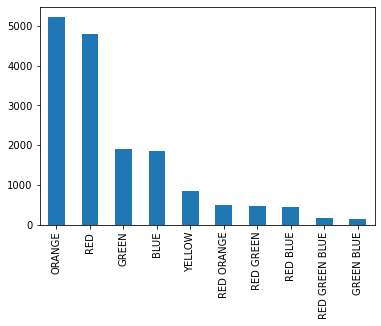

In [38]:

#because this output is list-like, you can index it and return only the top 10
print(ufos.Colors.value_counts().plot.bar())
print(ufos.Colors.value_counts()[:10].plot.bar())

<a id='filtering'></a>
## Filtering

Filtering and sorting allow us to retrieve particular rows instead of all rows.

To filter, we use a process called **Boolean Filtering**, wherein we define a Boolean condition. Then, we use the Boolean condition to filer on our `DataFrame`.

Recall: our given dataset has a column `Color`. Let's see if we can find all products that are `Black`. Let's take a look at the first 10 rows of the dataframe to see how it looks as-is:

In [43]:
# Start by selecting the top 10 rows of the dataset 
# to view the Color column as it sits:

#this is a "mask" - if you pass this in, it would return the Trues
#prod[[True, False, True, False, ...]]

#interior portion (prod['Color'] == 'Black') is a 'row mask' that does the same true/false logic as above
prod[prod['Color'] == 'Black']

#same thing
prod[prod.Color == 'Black']

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
317,LL Crankarm,CA-5965,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,L,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{3C9D10B7-A6B2-4774-9963-C19DCEE72FEA},2014-02-08 10:01:36.827000000
318,ML Crankarm,CA-6738,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,M,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{EABB9A92-FA07-4EAB-8955-F0517B4A4CA7},2014-02-08 10:01:36.827000000
319,HL Crankarm,CA-7457,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{7D3FD384-4F29-484B-86FA-4206E276FE58},2014-02-08 10:01:36.827000000
322,Chainring,CR-7833,0,0,Black,1000,750,0.0000,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{F0AC2C4D-1A1F-4E3C-B4D9-68AEA0EC1CE4},2014-02-08 10:01:36.827000000
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,"Mountain-500 Black, 48",BK-M18B-48,1,1,Black,100,75,294.5797,539.99,48,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{75752E26-A3B6-4264-9B06-F23A4FBDC5A7},2014-02-08 10:01:36.827000000
993,"Mountain-500 Black, 52",BK-M18B-52,1,1,Black,100,75,294.5797,539.99,52,...,M,L,U,1.0,23.0,2013-05-30 00:00:00,NaN,NaN,{69EE3B55-E142-4E4F-AED8-AF02978FBE87},2014-02-08 10:01:36.827000000
997,"Road-750 Black, 44",BK-R19B-44,1,1,Black,100,75,343.6496,539.99,44,...,R,L,U,2.0,31.0,2013-05-30 00:00:00,NaN,NaN,{44CE4802-409F-43AB-9B27-CA53421805BE},2014-02-08 10:01:36.827000000


By applying a `boolean mask` to this dataframe, `== 'Black'`, we can get the following:

In [52]:
# Start with the exact same code from the above cell. Test if it is == 'Black'.
# Remember that == means 'test for equality' and = means 'assign'

prod[prod.ListPrice > 3000.0]

# & - AND
# | - OR
# ^ - XOR either of the two but not both together

# bitwise operators have extreme priority so you need parens to enclose components
prod[(prod.ListPrice > 3000) & (prod.Color == 'Red')]

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
749,"Road-150 Red, 62",BK-R93R-62,1,1,Red,100,75,2171.2942,3578.27,62,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{BC621E1F-2553-4FDC-B22E-5E44A9003569},2014-02-08 10:01:36.827000000
750,"Road-150 Red, 44",BK-R93R-44,1,1,Red,100,75,2171.2942,3578.27,44,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{C19E1136-5DA4-4B40-8758-54A85D7EA494},2014-02-08 10:01:36.827000000
751,"Road-150 Red, 48",BK-R93R-48,1,1,Red,100,75,2171.2942,3578.27,48,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{D10B7CC1-455E-435B-A08F-EC5B1C5776E9},2014-02-08 10:01:36.827000000
752,"Road-150 Red, 52",BK-R93R-52,1,1,Red,100,75,2171.2942,3578.27,52,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{5E085BA0-3CD5-487F-85BB-79ED1C701F23},2014-02-08 10:01:36.827000000
753,"Road-150 Red, 56",BK-R93R-56,1,1,Red,100,75,2171.2942,3578.27,56,...,R,H,U,2.0,25.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{30819B88-F0D3-4E7A-8105-19F6FAC2CEFB},2014-02-08 10:01:36.827000000


Now we can use that 'mask' from above, and apply it to our full dataframe. Every time we have a `True` in a row, we return the row. If we have a `False` in that row, we do not return it. The result is a dataframe that only has rows where `Color` is `Black`:

In [ ]:
# Step 1: copy and paste the code from above, and 
# remove the head command.
# Step 2: wrap that entire test in df[ ] where df 
# is the name of your DataFrame.
# Step 3: add .head(3) at the end so we don't get a huge result.


In [ ]:
# What are other ways to filter? 
# Filter rows by one criterion:
production[production.NewName=='Bearing Ball'] 
production[production['NewName']=='Bearing Ball'] 
production.query('NewName == "Bearing Ball"') #note the difference in the quotes!

#Filter rows by several criterion (you NEED the parentheses or it won't work)
production[(production.Color=='Black') & (production.SafetyStockLevel > 800)]

Let's calculate the **average ListPrice** for the **salable products**.

> Think: What are the component parts of this problem?

In [63]:
# First, we need to get items where the FinishedGoodsFlag equals 1. 
# Use one of the methods in the cell above.
# Print the first few rows of the DataFrame to verify.

prod[prod.FinishedGoodsFlag == True].ListPrice.mean()

#alt

salable = prod[prod.FinishedGoodsFlag == True].ListPrice

salable.mean()

744.595220338982

Now, we need to find average list price of those above items. Let's just get the 'ListPrice' column for starters.

In [ ]:
# Use either . notation or [] notation to select the ListPrice column only.


To get the average of that column, just take `.mean()`

In [ ]:
# We're literally building on top of the previous prompts. 
# Just add the .mean() function to the end. You can keep adding pieces
# to your pandas commands.


We can take a shortcut and just use `.describe()` here instead of `.mean()`:

In [ ]:
production[production['FinishedGoodsFlag'] == 1]['ListPrice'].describe()

**Sneak peek**: Another handy trick is to use `.hist()` to get a distribution of a continuous variable - in this case, `ListPrice`. We'll cover this more in future lessons:

In [ ]:
production[production['FinishedGoodsFlag'] == 1]['ListPrice'].hist()

## Now you try!

With the UFO dataset (`ufos`):

+ Retrieve only the rows for the city 'Solana Beach'.
+ Make a histogram of number of sightings per state. (Hint: Use `value_counts()` and `hist()`).

<AxesSubplot:>

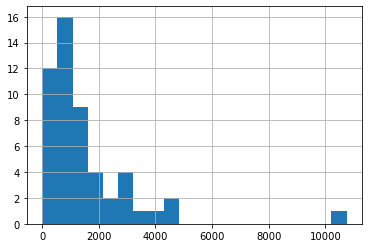

In [82]:
ufos[ufos.City == 'Solana Beach']

ufos.State.value_counts().hist(bins=20)

<a id='sorting'></a>
## Sorting

We can sort one column of our DataFrame as well.

In [85]:
# let's sort by standard cost, descending
# Use the sort_values method on the DataFrame
# You need to give the arguments by = 'ColumnName', ascending=False
# add .head(3) at the end so we don't get a huge result.

prod.sort_values(['Color', 'StandardCost'], ascending=True)

#permanently save the sort to the variable, instead of just viewing the sort.
#prod = prod.sort_values(['Color', 'StandardCost'], ascending=True)



,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
317,LL Crankarm,CA-5965,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,L,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{3C9D10B7-A6B2-4774-9963-C19DCEE72FEA},2014-02-08 10:01:36.827000000
318,ML Crankarm,CA-6738,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,M,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{EABB9A92-FA07-4EAB-8955-F0517B4A4CA7},2014-02-08 10:01:36.827000000
319,HL Crankarm,CA-7457,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{7D3FD384-4F29-484B-86FA-4206E276FE58},2014-02-08 10:01:36.827000000
322,Chainring,CR-7833,0,0,Black,1000,750,0.0000,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{F0AC2C4D-1A1F-4E3C-B4D9-68AEA0EC1CE4},2014-02-08 10:01:36.827000000
858,"Half-Finger Gloves, S",GL-H102-S,0,1,Black,4,3,9.1593,24.49,S,...,S,NaN,U,20.0,4.0,2012-05-30 00:00:00,NaN,NaN,{9E1DB5C3-539D-4061-9433-D762DC195CD8},2014-02-08 10:01:36.827000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,ML Road Seat Assembly,SA-R430,1,0,NaN,500,375,108.9900,147.14,NaN,...,NaN,M,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{AD109395-FDA9-4C2A-96F1-515CCDE3D9F4},2014-02-08 10:01:36.827000000
521,ML Touring Seat Assembly,SA-T612,1,0,NaN,500,375,108.9900,147.14,NaN,...,NaN,M,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{85B9A3DE-000C-4351-9494-05796689C216},2014-02-08 10:01:36.827000000
516,HL Mountain Seat Assembly,SA-M687,1,0,NaN,500,375,145.8700,196.92,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9E18ADAB-B9C7-45B1-BD95-1805EC4F297D},2014-02-08 10:01:36.827000000


In [ ]:
prod.sort_values(['Color', 'StandardCost'], ascending=True)
# let's take a look at the type of the unique values in the color column. 
# First, select the color column.
# Then, add the .unique() method at the end.
# Finally, wrap the whole thing in the type function to get the type.
# What did you get?


This one is a little more advanced, but it demonstrates a few things:
- Conversion of a `numpy.ndarray` object (return type of `pd.Series.unique()`) into a `pd.Series` object
- `pd.Series.sort_values` with the `by=` kwarg omitted (if only one column is the operand, `by=` doesn't need specified
- Alphabetical sort of a string field, `ascending=True` means A->Z
- Inclusion of nulls, `NaN` in a string field (versus omission with a float/int as prior example)

In [ ]:
# If we try to sort that list of unique colors, we'll get an error. 
# Uncomment the next line to prove it, then re-comment.
#production['Color'].unique().sort_values()

# That's because a numpy array doesn't have the sort_values method, but a pandas series does.
# So, let's convert it to a pandas series and then try to sort.
# Step 1: Get the unique colors (you can paste the first part of the line above)
# Step 2: wrap the whole thing in a pd.Series function (just like we'd do an int function to convert to integer)
# Step 3: add the sort_values method at the end.


## Now you try!

With the UFO dataset (`ufos`):

+ Sort the rows by state.
+ If not already, set the index to be the date and time of the sighting. Then, sort by the index.

In [ ]:
# A:

<a id='exercises'></a>
## Independent Exercises

Do your best to complete the following prompts. Don't hesitate to look at code we wrote together!

Print the first 4 rows of the whole DataFrame.

In [ ]:
# your answer here

How many rows are in the dataframe? Return the answer as an int.

In [ ]:
# your answer here. 

How many columns? Retrun the answer as an int.

In [ ]:
# your answer here. We didn't go over this explicitly, but think about how lists/tuples work. 
# How would you pull the second item?

How many different product lines are there?

In [ ]:
# your answer here. We want the count.

What are the values of these product lines?

In [ ]:
# your answer here

Do the number of values for the product lines match the number you have using `.nunique()`? Why or why not?

In [ ]:
# your answer here
# pd.Series.nunique() does not count nulls, seen as nan in a np.ndarray.

What's the length of the field corresponding to `Road` within the `ProductLine` column?

In [ ]:
# your answer here

Do you notice anything odd about this?

In [ ]:
# your answer here

How many products are there for the `Road` product line? Don't forget what you just worked on above! Return your answer as an int.

In [ ]:
# your answer here

How many products are there in the `Women's` `Mountain` category? Return your answer as an int. _Hint: Use the data dictionary above!_

In [ ]:
# your answer here

**Challenge:** What are the top 3 _most expensive list price_ product that are either in the `Women's` `Mountain` category, _OR_ `Silver` in `Color`? Return your answer as a DataFrame object, with the `ProductID` index, `NewName` relabeled as `Name`, and `ListPrice` columns. Perform the statement in one execution, and do not mutate the source DataFrame.

In [ ]:
# your answer here

<a id='recap'></a>
## Recap

We covered a lot of ground! It's ok if this takes a while to gel.

```python

# basic DataFrame operations
df.head()
df.tail()
df.shape
df.columns
df.Index

# selecting columns
df.column_name
df['column_name']

# renaming columns
df.rename({'old_name':'new_name'}, inplace=True)
df.columns = ['new_column_a', 'new_column_b']

# notable columns operations
df.describe() # five number summary
df.column_name.nunique() # number of unique values
df.column_name.value_counts() # number of occurrences of each value in column

# filtering
df[df.column_name < 50] # filter column to be less than 50

# sorting
df.sort_values(by='column_name', ascending = False) # sort biggest to smallest

```


It's common to refer back to your own code *all the time.* Don't hesistate to reference this guide! 🐼


